In [1]:
COMSOL="$OUTPUT_PATH/COMSOL56/Python/MPh"
VTK_TOOLS="$OUTPUT_PATH/COMSOL56/Python/"

import sys;

sys.path.append(COMSOL)
import mph;

sys.path.append(VTK_TOOLS)
import vtk_tools

import vtk
import numpy as np 
import pandas as pd

import os
print("PWD:", os.getcwd())  


DEBUG:mph:Using default configuration.


-----------------------
+Running 'ipykernel_launcher'... 
PWD: /Users/poderozita/Dropbox/PythonScrits/z2021_1/COMSOL/Python/Test04_1


In [2]:
CASE ="$OUTPUT_PATH/COMSOL56/CASES/"
mph_name = "%s/power_transistor_Model.mph" % CASE

client   = mph.start(cores=1)
model    = client.load(mph_name)
mph_name = mph_name.replace(".mph","")


INFO:mph:Starting local Comsol session.
DEBUG:mph:Checking installation folder "/Applications/COMSOL56/Multiphysics".
DEBUG:mph:Reported version info is "[comsol] CONFIG_FILE /Applications/COMSOL56/Multiphysics/bin/maci64/comsolcompile.ini
COMSOL Multiphysics 5.6.0.401".
DEBUG:mph:Assigned name "5.6" to this installation.
DEBUG:mph:No folder "Multiphysics" in "COMSOL56.app".
INFO:mph:Starting external server process.
INFO:mph:Server restricted to 1 processor core.


Version: '[comsol] CONFIG_FILE /Applications/COMSOL56/Multiphysics/bin/maci64/comsolcompile.ini
COMSOL Multiphysics 5.6.0.401' 


INFO:mph:Server listening on port 54436.
DEBUG:mph:JPype version is 1.3.0.
INFO:mph:Starting Java virtual machine.
DEBUG:mph:JVM arguments: ['/Applications/COMSOL56/Multiphysics/java/maci64/jre/Contents/Home/lib/server/libjvm.dylib']
INFO:mph:Java virtual machine has started.
INFO:mph:Connecting to server "localhost" at port 54436.
INFO:mph:Running on 1 processor core.
INFO:mph:Loading model "power_transistor_Model.mph".
INFO:mph:Finished loading model.


In [3]:
mph.tree(model)

power_transistor_Model
├─ parameters
│  └─ Parameters 1
├─ functions
│  ├─ Blackbody Radiation Intensity
│  └─ Smoothed Heaviside Function
├─ components
│  └─ Component 1
├─ geometries
│  └─ Geometry 1
│     ├─ Block 1
│     ├─ Work Plane 1
│     ├─ Extrude 1
│     ├─ Block 2
│     ├─ Block 3
│     ├─ Hexahedron 1
│     ├─ Union 1
│     ├─ Block 4
│     ├─ Block 5
│     ├─ Block 6
│     ├─ Block 7
│     ├─ Hexahedron 2
│     ├─ Mirror 1
│     ├─ Union 2
│     ├─ Cylinder 1
│     ├─ Difference 1
│     ├─ Transistor Chip
│     ├─ Work Plane 3
│     ├─ Revolve 1
│     ├─ Union 3
│     ├─ Array 1
│     ├─ Form Union
│     ├─ Form Composite Domains 1
│     └─ Form Composite Domains 2
├─ views
│  ├─ View 1
│  ├─ View 2
│  ├─ View 3
│  └─ View 4
├─ selections
│  └─ Transistor Chip
├─ coordinates
│  └─ Boundary System 1
├─ variables
├─ couplings
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ 

In [4]:
tAssemble = "a1"
model.java.sol('sol1').create(tAssemble,'Assemble');

In [5]:
import numpy as np 

tMatrix = "K" # K: stiffness matrix

model.java.sol('sol1').feature(tAssemble).set(tMatrix,"on") 
model.java.sol("sol1").runAll();

nRows = model.java.sol('sol1').feature(tAssemble).getM(tMatrix) # Get number of rows
nCols = model.java.sol('sol1').feature(tAssemble).getN(tMatrix) # Get number of columns
print(nRows,nCols)

Cols = np.array(model.java.sol('sol1').feature(tAssemble).getSparseMatrixCol(tMatrix)) # Get column indices of matrix values
Rows = np.array(model.java.sol('sol1').feature(tAssemble).getSparseMatrixRow(tMatrix)) # Get row indices of matrix values
Data = np.array(model.java.sol('sol1').feature(tAssemble).getSparseMatrixVal(tMatrix)) # Get matrix values


56091 56091


In [6]:
%%time
import scipy.sparse as sparse
mtx = sparse.coo_matrix((Data, (Rows,Cols)), shape=(nRows,nCols))

CPU times: user 165 ms, sys: 19.7 ms, total: 185 ms
Wall time: 261 ms


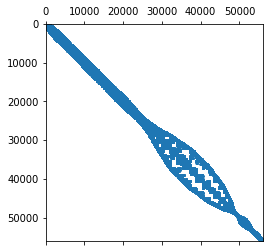

In [8]:
import matplotlib.pylab as plt

plt.spy(mtx, markersize=1)

## References 

https://www.comsol.com/blogs/implementing-the-weak-form-with-a-comsol-app/

https://doc.comsol.com/5.5/doc/com.comsol.help.comsol/COMSOL_ProgrammingReferenceManual.pdf
